# Pre-lab: How to use a Jupyter Notebook

Welcome to Lab 1! What you're looking at right now is a Jupyter Notebook, hosted on GitHub, running on Berkeley's Datahub service. What this means is that all the code in this file is hosted remotely, not on your computer. Therefore, you don't need to perform any setup on your computer to get this running! 

A notebook is a series of cells. Each cell can contain text (like this one) or code (like the one below). Any cell can be edited by double-clicking on it. A cell is run by pressing `shift` + `return`. Running a text cell exits the editing mode. Running a code cell runs the code and displays the output below the cell.

For this class, you will not need to edit any text or code cells (although you are welcome to if you'd like!). In lab, you will only need to run the cells we have created for you.

To make sure you know how to run cells, click on the code cell below and press `shift` + `return`. After running the cell, you should see the text `Hello, World!` underneath the cell.

In [9]:
print("Hello, World!")

Hello, World!


Now try running this next cell:

In [10]:
print("\N{WAVING HAND SIGN}, \N{EARTH GLOBE ASIA-AUSTRALIA}!")

👋, 🌏!


If you see a waving emoji, and an emoji of the world, then things are going well for you. **The following lab consists of code and text cells. Run each code cell (in the order presented) and read each text cell.** You don't need to run the text cells.

# Lab 1: Convolutional Maps

*(note: you won't see any output beneth the following code cell, but it's still important to run)*

In [11]:
%matplotlib inline
from skimage import io, color
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal
from ipywidgets import interact 

from IPython.display import Audio, display
import soundfile as sf
import numpy as np

def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

## Blurring an Image

Lets explore bluring images using a kernel. A **kernel** is a matrix that can be used for image processing, such as blurring. To blur an image using a kernel we will perform a convolution between a kernel and an image. A **convolution** is a mathematical operation on two functions (in this case our two matrices) that produces a third function (our blurred image).

A **matrix** is a rectangular array of numbers arranged in horizontal rows and vertical columns. Below is an example of a (4,4) matrix where each value in the matrix is 1.

In [12]:
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

Lets import an image of a butterfly that we can work with.

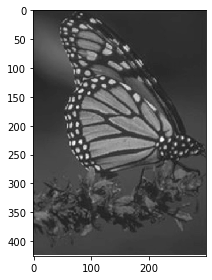

In [13]:
# Load image
butterfly = io.imread('assets/butterfly.jpg');

#convert to gray scale color map
gray_butterfly = color.rgb2gray(butterfly)

# Show image
plt.figure(); 
io.imshow(gray_butterfly)

Now we will use *np.random.rand* to create a random (5,5) matrix that we can use as our kernel to blur the butterfly image. Try running the cell below a few times and you will see that each time it outputs a different randomly produced matrix.

In [17]:
random_matrix = np.random.rand(5,5)
random_matrix 

array([[0.87140731, 0.26497945, 0.64797107, 0.23772347, 0.07480424],
       [0.7924768 , 0.5083771 , 0.42309918, 0.31474254, 0.63384065],
       [0.08963871, 0.09831131, 0.25327251, 0.35165341, 0.10461658],
       [0.66245742, 0.18498702, 0.68875794, 0.54151648, 0.66738259],
       [0.05756812, 0.49658315, 0.51982339, 0.77151949, 0.18193834]])

Now we will convolve the image with the random matrix. To do this, we will use *signal.convolve2d* imported from the SciPy library. 

/Users/luke/opt/anaconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


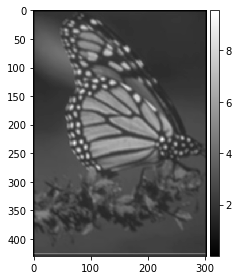

In [18]:
#using signal.convolve2d to blur butterfly
blurred_butterfly = signal.convolve2d(gray_butterfly, random_matrix)

#show blurred image
io.imshow(blurred_butterfly, cmap='gray')

What would happen if we used a larger or smaller random matrix to blur the image? Move the slider below find out. What do you notice?

In [19]:
def SquareKernel(matrix_size):
    return np.random.rand(matrix_size, matrix_size)

def AdjustKernelRadius(matrix_size):
    fim = signal.convolve2d(gray_butterfly, SquareKernel(matrix_size))
    io.imshow(fim, cmap='gray')
interact(AdjustKernelRadius, matrix_size=(1,20))

interactive(children=(IntSlider(value=10, description='matrix_size', max=20, min=1), Output()), _dom_classes=(…

<function __main__.AdjustKernelRadius(matrix_size)>

-----

## Edge Detection 

Now we will attempt to detect the edges in an image by performing a convolution of an input image and a kernel.

First, let's take a look at our image

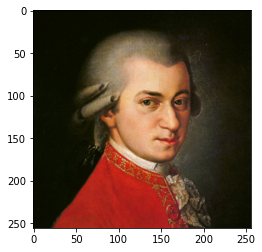

In [20]:
image = plt.imread('assets/mozart.png')
plt.imshow(image)

And let's see the dimensions of our matrix

In [21]:
print("The dimensions of our matrix are: ", image.shape)

The dimensions of our matrix are:  (256, 256, 3)


The matrix has the shape 256 by 256 by 3. This means the image is 256 pixels by 256 pixels, and each pixel is represented by 3 values: the red, green, and blue values.

As we saw in the previous example, a grayscale image is stored as a two-dimensional matrix, where each entry in the matrix corresponds to the intensity (from 0 to 1) of a single pixel of the image. A color image is stored as a three-dimensional matrix, since each pixel requires not just one intensity value, but three: one for red, one for green, and one for blue.

However, our input matrix must be two dimensional in order to be convolved with a two dimensional kernel. Therefore, our first step is to reduce the color image to a grayscale image, which essenitally "flattens" the three-dimensional matrix into two dimensions.

We will now apply a function to reduce our matrix to two dimensions.

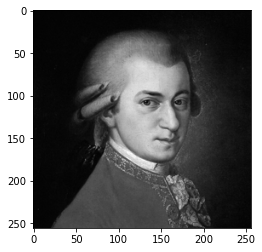

In [22]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

image_gray = rgb2gray(image)
plt.imshow(image_gray, cmap='gray')

Now let's check the dimensionality (shape) of our grayscale image.

In [23]:
image_gray.shape

(256, 256)

As we expected, our image is now represented as a two-dimensional matrix. It is still the same number of pixels (256 by 256), but there is no third dimension for RGB values. We are now ready to convolve our image with a kernel.

For edge detection, we will convolve our image with two different kernels, and then combine the results. One kernel will identify vertical edges and the other will identify horizontal edges. These matrices approximate the derivative; a large derivatice means a large change, which is likely to be an edge. The specific matrices we are using are known as the [Sobel operators](https://en.wikipedia.org/wiki/Sobel_operator).

In [24]:
sobel_x = np.array(
    [[1, 0, -1],  
    [2, 0, -2],  
    [1, 0, -1]])
sobel_y = np.array(
    [[1, 2, 1], 
    [0, 0, 0], 
    [-1, -2, -1]])

print("sobel_x")
print("------------------")
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in sobel_x]))
print("------------------\n")
print("sobel_y")
print("------------------")
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in sobel_y]))
print("------------------")


sobel_x
------------------
1	0	-1
2	0	-2
1	0	-1
------------------

sobel_y
------------------
1	2	1
0	0	0
-1	-2	-1
------------------


Now we will convolve our image with each matrix, and view the results.

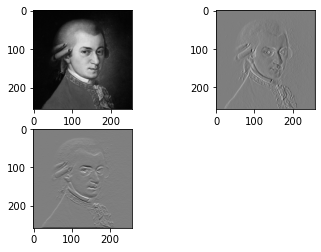

In [25]:
gradient_x = signal.convolve2d (image_gray, sobel_x)
gradient_y = signal.convolve2d (image_gray, sobel_y)

# TODO: would be nice to have titles here
# plt.figure(2)
plt.subplot(2, 2, 1)
plt.imshow (image_gray, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow (gradient_x, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow (gradient_y, cmap="gray")


Finally, we combine our x and y gradients to get the overall gradient of the image, and our edge detection is complete!

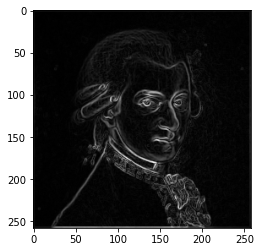

In [26]:
gradient = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
gradient *= 255.0 / gradient.max()
plt.imshow (gradient, cmap='gray')

## Convolution Reverb


In this section we will again perform convolutions, but on audio instead of images. Audio can be represented as a one-dimensional matrix, which is just a list, where each value in the matrix is the value of the waveform at a given time. These values range from -1 to 1.

We'll start by loading in the two sound files we will be working with. The first recording, `anechoic1.wav`, is a dry (reverb-free) recording of the Overture from Mozart's *The Marriage of Figaro*. The second sound file, `Concertgebouw-m.wav`, is a recording from the Concert Gebouw, a concert hall in Amsterdam, Netherlands. This recording captures the acoustics of the concert hall and will serve as our impulse response. 

In [ ]:
x, srx = sf.read('assets/anechoic1.wav')
h, srh = sf.read('assets/Concertgebouw-m.wav')
print("Length of anechoic1.wav in number of samples:", x.shape, "Sampling rate:", srx)
print("Length of Concertgebouw-m.wav in number of samples:", h.shape, "Sampling rate:", srx)        

assert srx == srh, 'sample rate must be the same in both files'

Listen to the two audio files:

In [ ]:
print("Mozart recording:")
display(Audio(x, rate=srx))

print("Impulse response:")
display(Audio(h, rate=srh))

And let's view the waveform of each sound:

In [ ]:
x_len = x.shape[0]
plt.plot(np.linspace(0, x_len/srx, num=x_len), x)
plt.title('Mozart recording waveform')
plt.xlabel('time (s)')

In [ ]:
h_len = h.shape[0]
plt.plot(np.linspace(0, h_len/srh, h_len), h)
plt.title('Impulse response waveform')
plt.xlabel('time (s)')

-----

Now that we are familiar with out inputs, let's review how convolution with audio files works.

Convolution with signals (sounds) is similar to convolution with images as we worked above. With signals, convolution can be thought of a signal sliding over another, or the weighted sum of the shifted copies of one function over all of its "space." Loosely, it is of the form

$$ y(n) = \sum_{-\infty}^{\infty} x(n)h(n) $$


With sound files, our domain becomes time which enables us to use the Convolution Theorem. The theorem states that convolution in the time domain is the same as complex multiplication in the frequency domain. In other words, we can multiply their frequency content (spectra) in the frequency domain. So, 

$$ y(t) = x(t) * h(t) = X(k)H(k) $$ 

where $X(k)$ and $H(k)$ are frequency representations of the signals $x$ and $h$. 

Our process of convolving the two signals using the Convolution Theorem is as follows:
1. Transform each signal into its frequency representation (spectrum) using the Fast Fourier Transform (FFT)
2. Multiply the two spectra together
3. Convert the resulting spectrum back into a time domain signal using the Inverse Fast Fourier Transform (IFFT)


In [ ]:
# the FFT is most efficient when the length of the signal is a power of two
if x.shape[0] > h.shape[0]:
    N = next_power_of_2(x.shape[0])
else:
    N = next_power_of_2(h.shape[0])

# calculate the real part of the FFT for each signal 
Xk = np.fft.rfft(x, N)
Hk = np.fft.rfft(h, N)

# multiply the two signals
convolved = Xk * Hk

# use IFFT to convert to time domain signal
mozart_reverb = np.fft.irfft(convolved)

Audio(mozart_reverb, rate=srx)

In [ ]:
# TODO: add some interactivity: how does changing `scale` affect the end result?
scale = .3
y = mozart_reverb
y *= scale

In [ ]:
# TODO: add some interactivity: how does changing `direct` affect the end result?
direct = 0

y[0:x.shape[0]] += x * direct

## Deconvolution

Now that we have applied reverb to the dry Mozart recording, can we perform the inverse operation? That is, given a dry (reverb-free) and wet (reverb) version of the same sound, can we retrieve the impulse response that was applied to the dry signal to create the wet signal? This is possible through the process of deconvolution.

### Wiener Deconvolution

Recall the previous equation we used when performing covolution:

$$ y(t) = x(t)*h(t) = X(k)H(k) $$

where $X$ and $H$ are the Fourier transforms of the respective time signals $x$ and $h$.

We were able to apply reverb to the Mozart recording $x$ using an impulse response $h$ to create a version of the recording with reverb, $y$.

Now, let's pretend we no longer have access to $h$. We have $x$ and $y$ and would like to calculate $h$

Now, it'spossible to calculate $h$ by performing a complex **division in frequency domain:**

$$ H(k) = \dfrac{Y(k)}{X(k)} $$

However, this method is impractical due to extreme senstivity to sounds,  so we will be using a better way to retrieve $h$.

**Wiener Deconvolution**:
* regularizing the complex division by some quantities depending on the known signals

$$ W(k) = \dfrac{Y(k)\overline{X(k)}}{|X(k)|^2 + \sigma^2} $$

In [ ]:
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

y = mozart_reverb
x, srx = sf.read('assets/anechoic1.wav')

scale = 3

N = next_power_of_2(y.shape[0])   
ft_y = np.fft.fft (y, N)
ft_x = np.fft.fft (x, N)
v =  max(abs(ft_x)) * 0.005

# resynthesis
ir_rebuild = np.fft.irfft(ft_y * np.conj (ft_x) / (v + abs (ft_x) ** 2))

sig_len = y.shape[0] - x.shape[0]
ir_rebuild = ir_rebuild[1:sig_len] * scale

Audio(ir_rebuild, rate=srx)